In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
BTN_SOBEL = np.array([[-1.,-2.,-1.], [0.,0.,0.], [1.,2.,1.]])
TOP_SOBEL = np.array([[0.,0.,0.], [0.,1.,0.], [0.,0.,0.]])
IDENDITY = np.array([[-1.,-2.,-1.], [0.,0.,0.], [1.,2.,1.]])
LFT_SOBEL = np.array([[1.,0.,-1.], [2.,0.,-2.], [1.,2.,-1.]])
SHARPEN = np.array([[0.,-1.,0.], [-1.,5.,-1.], [0.,-1.,0.]])
OUTLINE = np.array([[-1.,-1.,-1.], [-1.,8.,-1.], [-1.,-1.,-1.]])

In [10]:
def convolution(image_path, filter_weights):
    weights = tf.placeholder(tf.float32, shape=(3,3))
    
    image_content = tf.read_file(image_path)
    image = tf.image.decode_image(image_content, channels=3)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.convert_image_dtype([image], tf.float32)

    filters = tf.reshape(weights, shape=[3,3,1,1])
    stride = [1,1,1,1]
    conv_out = tf.nn.conv2d(image, filters, strides=stride, padding='SAME')
    
    with tf.Session() as sess:
        img = sess.run(conv_out, feed_dict={weights: filter_weights})
        return img

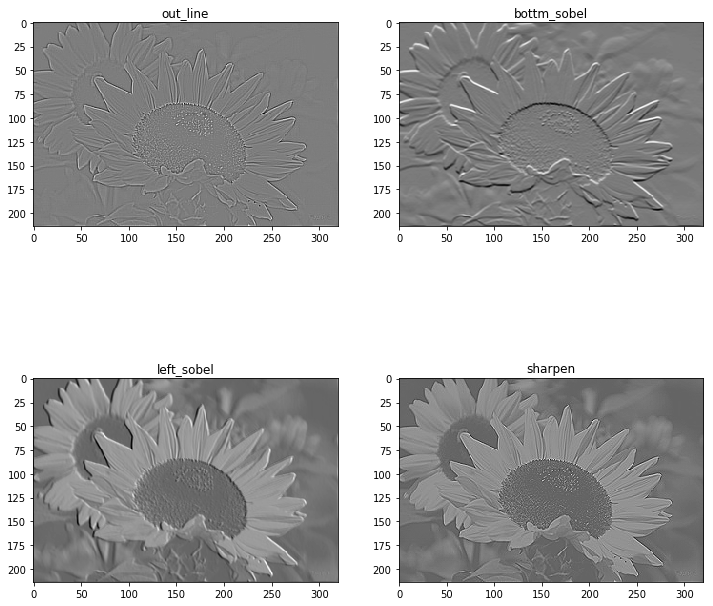

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
filters = {"bottm_sobel": BTN_SOBEL, "sharpen":SHARPEN, "left_sobel":LFT_SOBEL, "out_line":OUTLINE}
image_abspath = "images/flower.jpg"

with tf.Session() as sess:
    for index, item in enumerate(filters):
        img = convolution(image_abspath, filters[item])
        axes[index//2, index%2].imshow(img[0][:,:,0], cmap='gray')
        axes[index//2, index%2].set_title(item)